In [69]:
import re
import pandas as pd
from itertools import repeat
import numpy as np
import os
import glob
import re
import shutil
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv("cch00829.csv", header = 0)
cols = ['hour','day','month','QC','Height','WS','WD','u','v','w','No.','in','Cns','NE','SNR','db']
df.columns = [cols]
df

,hour,day,month,QC,Height,WS,WD,u,v,w,No.,in,Cns,NE,SNR,db
0,10,25,9,0,213,2.7,123.0,-2.30,1.49,-0.02,5,5,5,6,8,3
1,10,25,9,0,273,3.4,139.0,-2.24,2.56,0.04,5,5,5,-1,4,-3
2,10,25,9,0,333,4.5,138.0,-2.99,3.35,0.13,5,5,5,-7,-4,-9
3,10,25,9,0,394,4.7,135.0,-3.34,3.30,0.09,5,5,5,-6,-4,-8
4,10,25,9,0,454,5.8,136.0,-4.02,4.11,0.10,5,5,5,-8,-6,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16445,7,25,9,0,1416,20.5,97.0,-20.41,2.38,0.64,4,3,4,-13,-14,-15
16446,7,25,9,0,1476,20.9,109.0,-19.78,6.85,0.44,4,5,5,-12,-13,-14
16447,7,25,9,0,1536,23.2,106.0,-22.35,6.30,0.27,4,4,3,-13,-12,-18
16448,7,25,9,0,1596,24.2,105.0,-23.34,6.39,0.33,3,4,3,-17,-16,-19


In [71]:
#data = df
#a = data[["(m msl)"]]
#b = data[["(m/s).2"]]
# a

In [72]:
df['Date/time'] = df[['hour','day','month']].astype(str).agg('-'.join, axis = 1)

In [73]:
# df['Date/time'] = df['hour'].astype(str) + df['day'].astype(str) + df['month'].astype(str)

In [74]:
newdf = df[['Date/time','QC','Height','WS','WD']].copy()
newdf
dff =  newdf.copy()

In [75]:
df.shape

(16450, 17)

In [76]:
dff.iloc[:,1].unique()

array([0, 9], dtype=int64)

In [77]:
dff.shape

(16450, 5)

In [78]:
dff.columns

MultiIndex([('Date/time',),
            (       'QC',),
            (   'Height',),
            (       'WS',),
            (       'WD',)],
           )

In [79]:
dff[dff['QC'] == 9].index

TypeError: only integer scalar arrays can be converted to a scalar index

In [80]:
dff.drop(dff[dff['WS'] == -950].index,inplace=True)

TypeError: only integer scalar arrays can be converted to a scalar index

In [81]:
dff.shape

(16450, 5)

In [82]:
cols  =['Date/time','QC','Height','WS','WD']

ls =  {'Date/time': [], 'QC': [], 'Height': [] ,'WS': [],'WD': [] }
for k in range(dff.shape[0]):
    data =  list(dff.iloc[k,:])
    if(data[1] == 0):
        ls['Date/time'].append(data[0])
        ls['QC'].append(data[1])
        ls['Height'].append(data[2])
        ls['WS'].append(data[3])
        ls['WD'].append(data[4])


In [83]:
cleandf  = pd.DataFrame(ls)

In [84]:
cleandf.head(25)

,Date/time,QC,Height,WS,WD
0,10-25-9,0,213,2.7,123.0
1,10-25-9,0,273,3.4,139.0
2,10-25-9,0,333,4.5,138.0
3,10-25-9,0,394,4.7,135.0
4,10-25-9,0,454,5.8,136.0
5,10-25-9,0,514,6.3,129.0
6,10-25-9,0,574,6.6,126.0
7,10-25-9,0,634,7.8,118.0
8,10-25-9,0,694,7.6,112.0
9,10-25-9,0,754,8.4,107.0


In [93]:
times = cleandf.iloc[:,0].unique()

In [114]:
cleant = cleandf[cleandf['Date/time']==times[31]]

In [122]:
a = cleant.iloc[0:,2]
b = cleant.iloc[0:,4]
a

101     213
102     273
103     333
104     394
105     454
106     514
107     574
108     634
109     694
110     935
111     995
112    1055
113    1115
114    1356
115    1656
Name: Height, dtype: int64

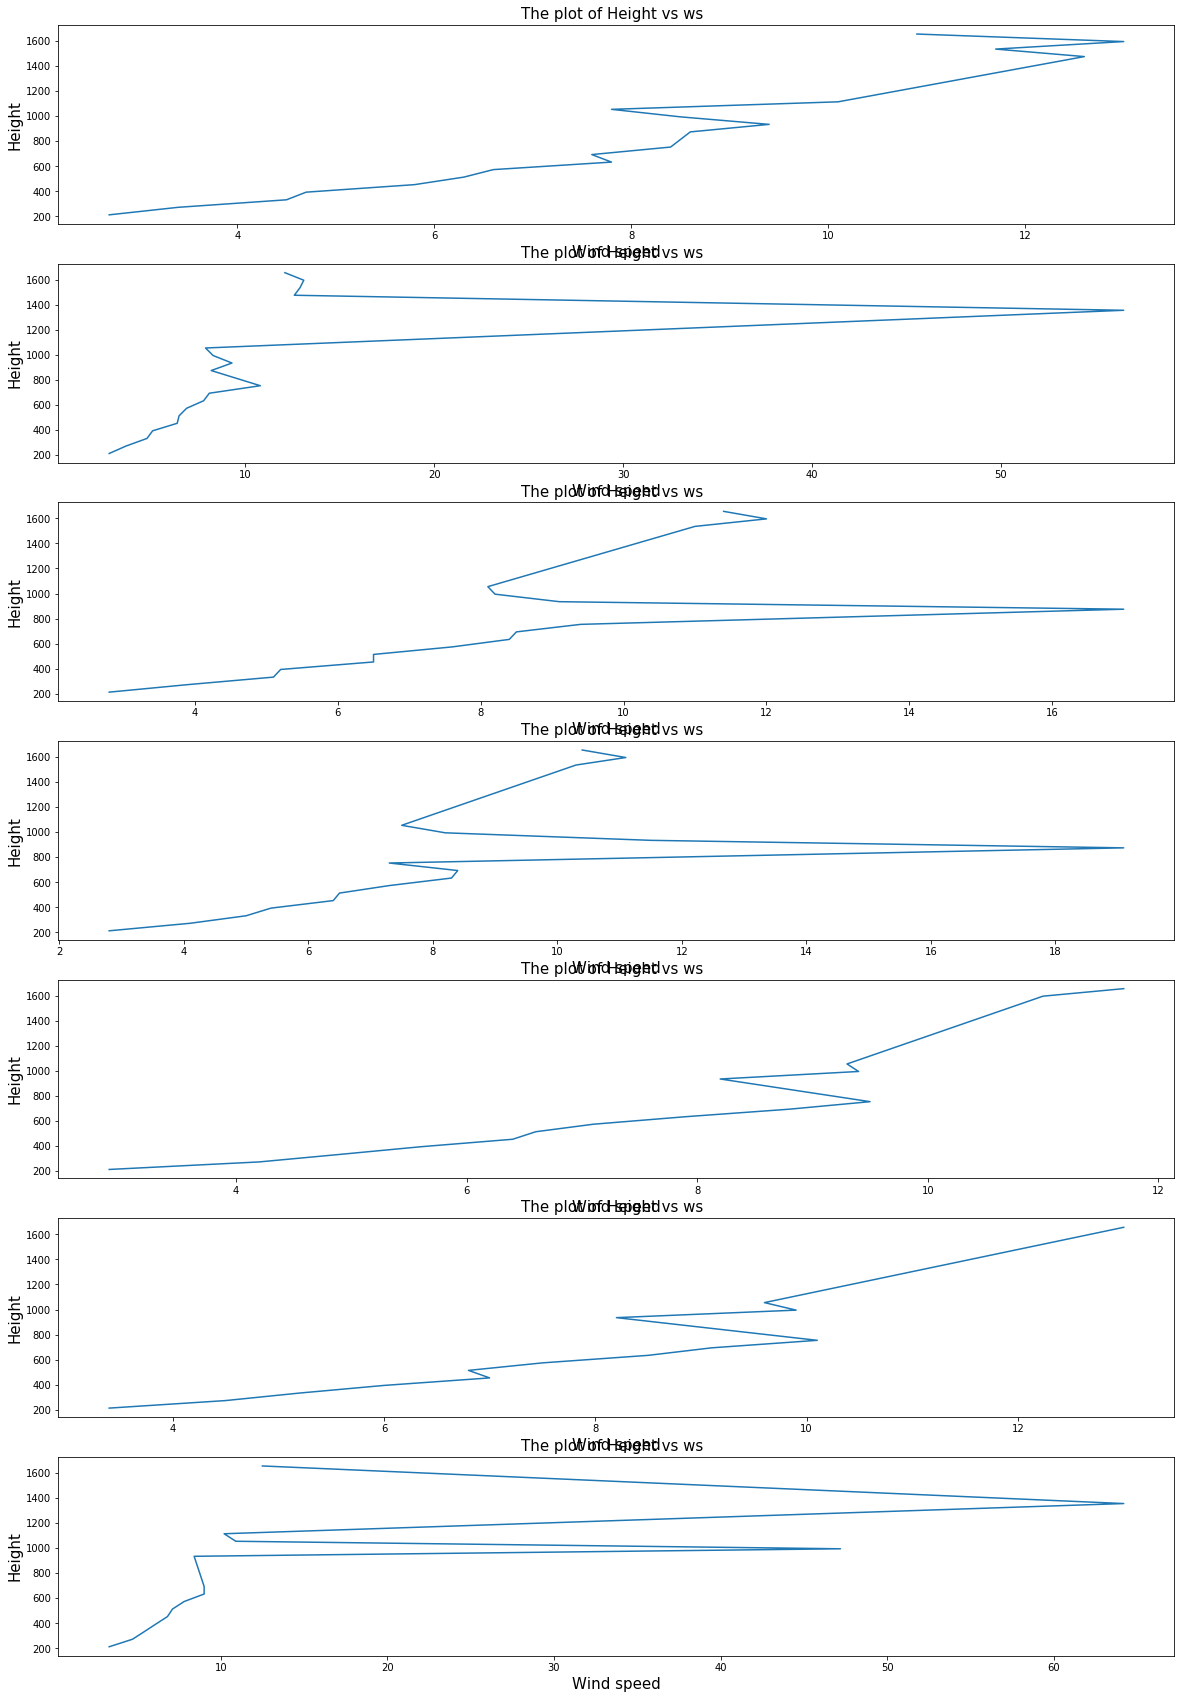

In [123]:
plt.figure(figsize=(20,30))
c =  7
for k in range(c):
    cleant = cleandf[cleandf['Date/time']==times[k]]
    plt.subplot(c,1,k+1)
    a = cleant.iloc[0:,2]
    b = cleant.iloc[0:,3]
    plt.plot(b,a)
    plt.title("The plot of Height vs ws  ",fontsize=15)
    plt.xlabel('Wind speed',fontsize=15)
    plt.ylabel('Height',fontsize=15)
plt.show()

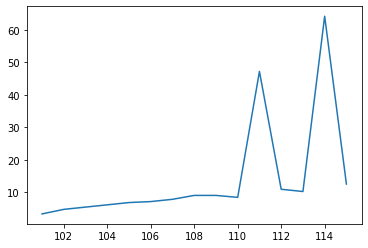

In [124]:
plt.plot(b)

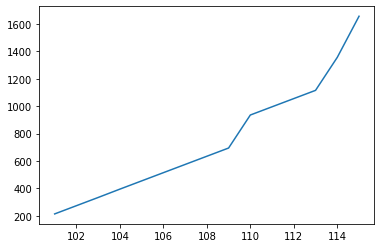

In [125]:
plt.plot(a)

In [126]:
# cleandf.iloc[:,1].unique()

In [127]:

#a = cleandf.iloc[0:25,2]
#b = cleandf.iloc[0:25,3]

In [128]:
#plt.figure(figsize=(10,8))
#plt.plot(b,a)
#plt.title("The plot of Height vs ws of the first block ",fontsize=15)
#plt.xlabel('Wind speed',fontsize=15)
#plt.ylabel('Height',fontsize=15)
#plt.grid()
#plt.show()

In [96]:
#df=pd.read_csv("shw70823.w1b.csv")

In [97]:
#a1 = newdf.iloc[26:51,2]
#b1 = newdf.iloc[26:51,3]



In [98]:
# plt.figure(figsize=(10,8))
# plt.plot(b1,a1)
# plt.title("The plot of Height vs ws of the second  block ",fontsize=15)
# plt.xlabel('Wind speed',fontsize=15)
# plt.ylabel('Height',fontsize=15)
# plt.grid()
# plt.show()

In [99]:
# a2 = newdf.iloc[52:77,2]
# b2 = newdf.iloc[52:77,3]
# len(a2)

In [100]:
# plt.figure(figsize=(10,8))
# plt.plot(b2,a2)
# plt.title("The plot of Height vs ws of the third block ",fontsize=15)
# plt.xlabel('Wind speed',fontsize=15)
# plt.ylabel('Height',fontsize=15)
# plt.grid()
# plt.show()

In [101]:
# a3 = newdf.iloc[78:103,2]
# b3 = newdf.iloc[78:103,3]

In [102]:
# plt.figure(figsize=(10,8))
# plt.plot(b3,a3)
# plt.title("The plot of Height vs ws of the fourth block ",fontsize=15)
# plt.xlabel('Wind speed',fontsize=15)
# plt.ylabel('Height',fontsize=15)
# plt.grid()
# plt.show()

In [103]:
# a4 = newdf.iloc[78:103,2]
# b4 = newdf.iloc[78:103,4]

In [104]:
# plt.figure(figsize=(10,8))
# plt.plot(b4,a4)
# plt.title("The plot of Height vs WD of the third block ",fontsize=15)
# plt.xlabel('Wind direction',fontsize=15)
# plt.ylabel('Height',fontsize=15)
# plt.grid()
# plt.show()